## Get Requirements

In [ ]:
import torch
from torchvision import transforms, datasets
import torch.nn as nn
from torch import optim as optim
import numpy as np
import matplotlib.pyplot as plt
import h5py
#import helpers
import numpy as np
from pathlib import Path
import torch
from torch.utils import data
# import cv2
import math
from PIL import Image
!pip install einops
from einops import rearrange, reduce, repeat
from einops.layers.torch import Rearrange, Reduce
from torch.utils.data import Dataset, DataLoader
import time
import glob
print(torch.__version__)
import scipy 
from scipy import signal
from sklearn.decomposition import FastICA, PCA
from scipy.signal import butter, lfilter
from scipy.signal import freqz

1.10.0+cu111


In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
cd '/content/drive/MyDrive/EarEEG'

/content/drive/.shortcut-targets-by-id/1wvikFzVxg9V1AAsD9OBWVp3Q_aSVl5X4/EarEEG


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device 

device(type='cuda')

### Neptune (Ignore this block)

In [ ]:
pip install neptune-client

In [ ]:
import neptune.new as neptune

 # your credentials

run = neptune.init(
    project="mithunjha/earEEG-v2-cross",
    api_token="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiIwZjA0YTVhOC02ZGVlLTQ0NTktOWY3NS03YzFhZWUxY2M4MTcifQ==",
)  # your credentials

# run = neptune.init(
#     project="jathurshan0330/Ear-EEG-CMT",
#     api_token="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiJmYmRmNjE0Zi0xMDRkLTRlNzUtYmIxNi03NzM2ODBlZDc5NTMifQ==",
# )  # your credentials

https://app.neptune.ai/mithunjha/earEEG-v2-cross/e/EAREEGV2-162
Remember to stop your run once you’ve finished logging your metadata (https://docs.neptune.ai/api-reference/run#.stop). It will be stopped automatically only when the notebook kernel/interactive console is terminated.


In [ ]:
experiment = "EAREEGV2-162"
!mkdir "/content/drive/MyDrive/EarEEG/EAREEGV2-162"  # Change This

## Ear-EEG Data

In [ ]:
pwd

'/content/drive/.shortcut-targets-by-id/1wvikFzVxg9V1AAsD9OBWVp3Q_aSVl5X4/EarEEG'

In [ ]:
import Datasets.sleepedf_dataset
from Datasets.sleepedf_dataset import extract_stft, read_h5py,extract_stft_multiple_epochs

In [ ]:
def split_data(data_list,train_list,val_list):
    data_list = np.array(data_list)
    train_data_list = data_list[train_list]
    val_data_list = data_list[val_list]
    return train_data_list, val_data_list

In [ ]:
train_data_list = [1,2,3,5,6,8,7]  #4 discarded 
val_data_list = [0]

psg_sig_list = glob.glob('/content/drive/MyDrive/EarEEG/x*.h5')
psg_sig_list.sort()
[train_psg_list, val_psg_list] = split_data(psg_sig_list,train_data_list,val_data_list)
print(train_psg_list)
print(val_psg_list)


label_list = glob.glob('/content/drive/MyDrive/EarEEG/y*.h5')
label_list.sort()
[train_label_list, val_label_list] = split_data(label_list,train_data_list,val_data_list)
print(train_label_list)
print(val_label_list)

mean_list = glob.glob('/content/drive/MyDrive/EarEEG/mean*.h5')
mean_list.sort()
[train_mean_list, val_mean_list] = split_data(mean_list,train_data_list,val_data_list)
print(train_mean_list)
print(val_mean_list)

sd_list = glob.glob('/content/drive/MyDrive/EarEEG/std*.h5')
sd_list.sort()
[train_sd_list, val_sd_list] = split_data(sd_list,train_data_list,val_data_list)
print(train_sd_list)
print(val_sd_list)

id_list = glob.glob('/content/drive/MyDrive/EarEEG/len*.h5')
id_list.sort()
[train_id_list, val_id_list] = split_data(id_list,train_data_list,val_data_list)
print(train_id_list)
print(val_id_list)


['/content/drive/MyDrive/EarEEG/x2.h5'
 '/content/drive/MyDrive/EarEEG/x3.h5'
 '/content/drive/MyDrive/EarEEG/x4.h5'
 '/content/drive/MyDrive/EarEEG/x6.h5'
 '/content/drive/MyDrive/EarEEG/x7.h5'
 '/content/drive/MyDrive/EarEEG/x9.h5'
 '/content/drive/MyDrive/EarEEG/x8.h5']
['/content/drive/MyDrive/EarEEG/x1.h5']
['/content/drive/MyDrive/EarEEG/y2.h5'
 '/content/drive/MyDrive/EarEEG/y3.h5'
 '/content/drive/MyDrive/EarEEG/y4.h5'
 '/content/drive/MyDrive/EarEEG/y6.h5'
 '/content/drive/MyDrive/EarEEG/y7.h5'
 '/content/drive/MyDrive/EarEEG/y9.h5'
 '/content/drive/MyDrive/EarEEG/y8.h5']
['/content/drive/MyDrive/EarEEG/y1.h5']
['/content/drive/MyDrive/EarEEG/mean2.h5'
 '/content/drive/MyDrive/EarEEG/mean3.h5'
 '/content/drive/MyDrive/EarEEG/mean4.h5'
 '/content/drive/MyDrive/EarEEG/mean6.h5'
 '/content/drive/MyDrive/EarEEG/mean7.h5'
 '/content/drive/MyDrive/EarEEG/mean9.h5'
 '/content/drive/MyDrive/EarEEG/mean8.h5']
['/content/drive/MyDrive/EarEEG/mean1.h5']
['/content/drive/MyDrive/EarEEG/st

In [ ]:
rejection_list = read_h5py("/content/drive/MyDrive/EarEEG/rejected.h5")
print(rejection_list)

[train_reject_list, val_reject_list] = split_data(rejection_list,train_data_list,val_data_list)
print(train_reject_list)
print(val_reject_list)

Reading from /content/drive/MyDrive/EarEEG/rejected.h5 ====================================================
Keys in the h5py file : <KeysViewHDF5 ['x']>
Number of samples : 9
Shape of each data : (9, 12)
[[False  True  True  True  True  True  True  True  True False  True  True]
 [ True  True  True  True  True  True  True False  True  True False  True]
 [ True  True  True  True  True  True  True  True  True  True False  True]
 [ True  True  True  True  True False False  True  True  True  True  True]
 [ True  True  True False False False  True  True  True  True False False]
 [ True  True  True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True False  True  True]
 [ True  True False  True  True  True  True  True  True False  True  True]]
[[ True  True  True  True  True  True  True False  True  True False  True]
 [ True  True  True  True  True  True  True  

## Edited

In [ ]:
# def EEG_process(data,rejected_list,i=0):
#     _,_,_,_,_,ELA,ELE,ELI,ERA,ERG,ERE,ERI,_,_,_,_,_,ELB,ELG,ELK,ERB,ERK,_ = data
#     reject = rejected_list[i]
#     ear_eeg = [ELA,ELE,ELI,ERA,ERG,ERE,ERI,ELB,ELG,ELK,ERB,ERK]
    

#     Left_ear = (ear_eeg[0] + ear_eeg[1] + ear_eeg[2] + ear_eeg[7] + ear_eeg[8] + ear_eeg[9])/6  # (ELA + ELE + ELI + ELB + ELG + ELK)/6
#     Right_ear = (ear_eeg[3] + ear_eeg[4] + ear_eeg[5] + ear_eeg[6] + ear_eeg[10] + ear_eeg[11])/6 # (ERA + ERG + ERE + ERI + ERB + ERK)/6
#     L_R = Left_ear - Right_ear

#     if np.count_nonzero([reject[0],reject[7]]) != 0 :
#         L_E = (ear_eeg[0]+ear_eeg[7])/2 - (ear_eeg[1]+ear_eeg[2]+ear_eeg[8]+ear_eeg[9])/4 #(ELA + ELB)/2 - (ELE + ELI + ELG + ELK)/4
#     else:
#         L_E = np.zeros(data.shape[1])
#     if np.count_nonzero([reject[3],reject[10]]) != 0 :
#         R_E = (ear_eeg[3]+ear_eeg[10])/2 - (ear_eeg[4]+ear_eeg[5]+ear_eeg[6]+ear_eeg[11])/4 # (ERA + ERB)/2 - (ERE + ERI + ERG + ERK)/4
#     else:
#         R_E = np.zeros(data.shape[1])

#     return L_R, L_E, R_E

In [ ]:
def EEG_process(data,rejected_list,i=0):
    _,_,_,_,_,ELA,ELE,ELI,ERA,ERG,ERE,ERI,_,_,_,_,_,ELB,ELG,ELK,ERB,ERK,_ = data
    reject = rejected_list[i]
    ear_eeg = [ELA,ELE,ELI,ERA,ERG,ERE,ERI,ELB,ELG,ELK,ERB,ERK]
    
    for j in range (len(reject)):
        ear_eeg[j]=ear_eeg[j]*reject[j]
    

    Left_ear = (ear_eeg[0] + ear_eeg[1] + ear_eeg[2] + ear_eeg[7] + ear_eeg[8] + ear_eeg[9])/np.count_nonzero([reject[0],reject[1],reject[2],reject[7],reject[8],reject[9]])   # (ELA + ELE + ELI + ELB + ELG + ELK)/6
    Right_ear = (ear_eeg[3] + ear_eeg[4] + ear_eeg[5] + ear_eeg[6] + ear_eeg[10] + ear_eeg[11])/np.count_nonzero([reject[3],reject[4],reject[5],reject[6],reject[10],reject[11]]) # (ERA + ERG + ERE + ERI + ERB + ERK)/6
    L_R = Left_ear - Right_ear

    if np.count_nonzero([reject[0],reject[7]]) != 0 :
        L_E = (ear_eeg[0]+ear_eeg[7])/np.count_nonzero([reject[0],reject[7]]) - (ear_eeg[1]+ear_eeg[2]+ear_eeg[8]+ear_eeg[9])/np.count_nonzero([reject[1],reject[2],reject[8],reject[9]]) #(ELA + ELB)/2 - (ELE + ELI + ELG + ELK)/4
    else:
        L_E = np.zeros(data.shape[1])
    if np.count_nonzero([reject[3],reject[10]]) != 0 :
        R_E = (ear_eeg[3]+ear_eeg[10])/np.count_nonzero([reject[3],reject[10]]) - (ear_eeg[4]+ear_eeg[5]+ear_eeg[6]+ear_eeg[11])/np.count_nonzero([reject[4],reject[5],reject[6],reject[11]]) # (ERA + ERB)/2 - (ERE + ERI + ERG + ERK)/4
    else:
        R_E = np.zeros(data.shape[1])
    
    # L_R = butter_bandpass_filter(L_R)
    # L_R = iir_notch_filter(L_R)

    # L_E = butter_bandpass_filter(L_E)
    # L_E = iir_notch_filter(L_E)

    # R_E = butter_bandpass_filter(R_E)
    # R_E = iir_notch_filter(R_E)

    return L_R, L_E, R_E

In [ ]:
class EarEEG_MultiChan_Dataset(Dataset):
    def __init__(self, psg_file, label_file, device, mean_l = None, sd_l = None,reject_list = None, transform=None, target_transform=None, sub_wise_norm = False):
        """
      # C3,O1,A1,F3,LOC,ELA,ELE,ELI,ERA,ERG,ERE,ERI,C4,O2,A2,F4,ROC,ELB,ELG,ELK,ERB,ERK,CHIN12
        """
        # Get the data
        for i in range(len(psg_file)):
          if i == 0:
            if reject_list.any():
              psg_signal = read_h5py(psg_file[i])
              L_R, L_E, R_E = EEG_process(psg_signal,reject_list,i=i)
              # print(L_R.shape,L_E.shape,R_E.shape)
              # break
              L_R = np.reshape(L_R,(L_R.shape[0],1,L_R.shape[1]))
              L_E = np.reshape(L_E,(L_E.shape[0],1,L_E.shape[1]))
              R_E = np.reshape(R_E,(R_E.shape[0],1,R_E.shape[1]))

              # L_R = (L_R - np.mean(L_R))/np.std(L_R)
              # L_E = (L_E - np.mean(L_E))/np.std(L_E)
              # R_E = (R_E - np.mean(R_E))/np.std(R_E)
              # eeg_f3_o1 = np.reshape(psg_signal[3] - psg_signal[1],(L_R.shape[0],1,L_R.shape[-1]))
              # eeg_f4_o2 = np.reshape(psg_signal[15] - psg_signal[13],(L_R.shape[0],1,L_R.shape[-1]))
              # eeg_c3_a2 = np.reshape(psg_signal[0] - psg_signal[14],(L_R.shape[0],1,L_R.shape[-1]))
              # eeg_c4_a1 = np.reshape(psg_signal[12] - psg_signal[2],(L_R.shape[0],1,L_R.shape[-1]))
              # eeg_c3_o1 = np.reshape(psg_signal[0] - psg_signal[1],(L_R.shape[0],1,L_R.shape[-1]))
              # eeg_c4_o2 = np.reshape(psg_signal[12] - psg_signal[13],(L_R.shape[0],1,L_R.shape[-1]))
              # eeg_a1_a2 = np.reshape(psg_signal[2] - psg_signal[14],(L_R.shape[0],1,L_R.shape[-1]))

              # eog =  np.reshape(psg_signal[16] - psg_signal[4],(L_R.shape[0],1,L_R.shape[-1]))
              # emg = np.reshape(psg_signal[22],(L_R.shape[0],1,L_R.shape[-1]))
              # self.psg = np.concatenate((L_R,eog,emg),axis = 1) 
              self.psg = np.concatenate((L_R,L_E,R_E),axis = 1) 
              # self.psg = np.concatenate((L_E,R_E,eog),axis = 1) 
              # self.psg = np.concatenate((eeg_a1_a2,eeg_c3_o1,eeg_c4_o2),axis = 1) 
              # self.psg = np.concatenate((eeg_a1_a2,eeg_c3_a2,eeg_c4_a1),axis = 1) 
              # self.psg = np.concatenate((eeg_c3_a1,eeg_c4_a2,eog),axis = 1) 

              self.labels = read_h5py(label_file[i])
            else:  
              self.psg = read_h5py(psg_file[i])
              self.labels = read_h5py(label_file[i])
          else:
            if reject_list.any():
              psg_signal = read_h5py(psg_file[i])
              L_R, L_E, R_E = EEG_process(psg_signal,reject_list,i=i)
              L_R = np.reshape(L_R,(L_R.shape[0],1,L_R.shape[1]))
              L_E = np.reshape(L_E,(L_E.shape[0],1,L_E.shape[1]))
              R_E = np.reshape(R_E,(R_E.shape[0],1,R_E.shape[1]))

              # L_R = (L_R - np.mean(L_R))/np.std(L_R)
              # L_E = (L_E - np.mean(L_E))/np.std(L_E)
              # R_E = (R_E - np.mean(R_E))/np.std(R_E)
              # eeg_f3_o1 = np.reshape(psg_signal[3] - psg_signal[1],(L_R.shape[0],1,L_R.shape[-1]))
              # eeg_f4_o2 = np.reshape(psg_signal[15] - psg_signal[13],(L_R.shape[0],1,L_R.shape[-1]))
              # eeg_c3_a2 = np.reshape(psg_signal[0] - psg_signal[14],(L_R.shape[0],1,L_R.shape[-1]))
              # eeg_c4_a1 = np.reshape(psg_signal[12] - psg_signal[2],(L_R.shape[0],1,L_R.shape[-1]))
              # eeg_c3_o1 = np.reshape(psg_signal[0] - psg_signal[1],(L_R.shape[0],1,L_R.shape[-1]))
              # eeg_c4_o2 = np.reshape(psg_signal[12] - psg_signal[13],(L_R.shape[0],1,L_R.shape[-1]))
              # eeg_a1_a2 = np.reshape(psg_signal[2] - psg_signal[14],(L_R.shape[0],1,L_R.shape[-1]))

              # eog =  np.reshape(psg_signal[16] - psg_signal[4],(L_R.shape[0],1,L_R.shape[-1]))
              # emg = np.reshape(psg_signal[22],(L_R.shape[0],1,L_R.shape[-1]))
              # psg_comb = np.concatenate((L_R,eog,emg),axis = 1) 
              psg_comb = np.concatenate((L_R,L_E,R_E),axis = 1) 
              # psg_comb = np.concatenate((L_E,R_E,eog),axis = 1) 
              # psg_comb = np.concatenate((eeg_a1_a2,eeg_c3_a2,eeg_c4_a1),axis = 1) 
              # psg_comb = np.concatenate((eeg_c3_a1,eeg_c4_a2,eog),axis = 1) 


              self.psg = np.concatenate((self.psg,psg_comb),axis = 0)
              self.labels = np.concatenate((self.labels, read_h5py(label_file[i])),axis = 0)

            else:
              self.psg = np.concatenate((self.psg, read_h5py(psg_file[i])),axis = 1)
              self.labels = np.concatenate((self.labels, read_h5py(label_file[i])),axis = 0)

        self.labels = torch.from_numpy(self.labels)
        print(f"Data shape : {self.psg.shape}")
        print(f"Labels shape : {self.labels.shape}")
        bin_labels = np.bincount(self.labels)
        print(f"Labels count: {bin_labels/self.labels.shape[0]}")
        print(f"Labels count weights: {1/(bin_labels/self.labels.shape[0])}")
        
        if sub_wise_norm == True:
          print(f"Reading Subject wise mean and sd")
          for i in range(len(mean_l)):
            if i == 0:
              self.mean_l  = read_h5py(mean_l[i])
              self.sd_l = read_h5py(sd_l[i])
            else:
              self.mean_l = np.concatenate((self.mean_l, read_h5py(mean_l[i])),axis = 1)
              self.sd_l = np.concatenate((self.sd_l, read_h5py(sd_l[i])),axis = 1)

          print(f"Shapes of Mean  : {self.mean_l.shape}")
          print(f"Shapes of Sd    : {self.sd_l.shape}")
        else:     
          self.mean = mean_l
          self.sd = sd_l
          print(f"Mean : {self.mean} and SD {self.sd}")  

        self.sub_wise_norm = sub_wise_norm
        self.device = device
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        psg_data = self.psg[idx]         
        # print(data.shape)
        label = self.labels[idx,]
        
        if self.sub_wise_norm ==True:
          psg_data = (psg_data - self.mean_l[idx]) / self.sd_l[idx]
        elif self.mean and self.sd:
          psg_data = (psg_data - self.mean_l) / self.sd_l

        if self.transform:
            psg_data = self.transform(psg_data)
        if self.target_transform:
            label = self.target_transform(label)
        return psg_data, label

In [ ]:
train_dataset = EarEEG_MultiChan_Dataset(psg_file = train_psg_list, 
                                       label_file = train_label_list, device = device, 
                                    #    mean_l = val_mean_list, sd_l = val_sd_list,
                                       reject_list = train_reject_list,
                                       sub_wise_norm = False,
                                       transform=transforms.Compose([
                                        transforms.ToTensor(),
                                        # #  transforms.Normalize(
                                        #     (0.5,), (0.5,))
                                        ]) )
val_dataset = EarEEG_MultiChan_Dataset(psg_file = val_psg_list, 
                                       label_file = val_label_list, device = device, 
                                    #    mean_l = val_mean_list, sd_l = val_sd_list,
                                       reject_list = val_reject_list,
                                       sub_wise_norm = False,
                                       transform=transforms.Compose([
                                        transforms.ToTensor(),
                                        # #  transforms.Normalize(
                                        #     (0.5,), (0.5,))
                                        ]) )

Reading from /content/drive/MyDrive/EarEEG/x2.h5 ====================================================
Keys in the h5py file : <KeysViewHDF5 ['x']>
Number of samples : 23
Shape of each data : (23, 964, 6000)
Reading from /content/drive/MyDrive/EarEEG/y2.h5 ====================================================
Keys in the h5py file : <KeysViewHDF5 ['y']>
Number of samples : 964
Shape of each data : (964,)
Reading from /content/drive/MyDrive/EarEEG/x3.h5 ====================================================
Keys in the h5py file : <KeysViewHDF5 ['x']>
Number of samples : 23
Shape of each data : (23, 932, 6000)
Reading from /content/drive/MyDrive/EarEEG/y3.h5 ====================================================
Keys in the h5py file : <KeysViewHDF5 ['y']>
Number of samples : 932
Shape of each data : (932,)
Reading from /content/drive/MyDrive/EarEEG/x4.h5 ====================================================
Keys in the h5py file : <KeysViewHDF5 ['x']>
Number of samples : 23
Shape of each data

In [ ]:
batch_size = 32
train_data_loader = data.DataLoader(train_dataset, batch_size = batch_size, shuffle = True)
val_data_loader = data.DataLoader(val_dataset, batch_size = batch_size, shuffle = True)

PSG batch shape: torch.Size([32, 1, 3, 6000])
Labels batch shape: torch.Size([32])


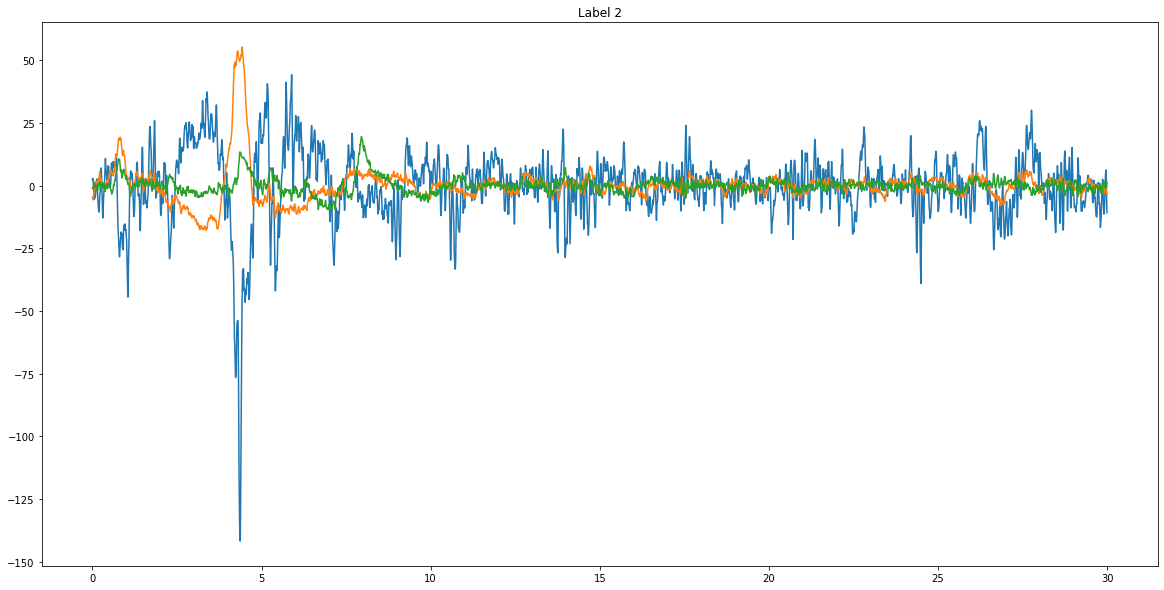

EarEEG Minimum :-141.72407622902483
EarEEG Maximum :44.29788345186947
EOG Minimum :-17.753081409390887
EOG Maximum :55.387748895039266
EMG Minimum :-9.64001285064279
EMG Maximum :19.56518087073644
EarEEG Mean :-0.062091136676198366
EarEEG Standard Deviation :14.106759496737466
EOG Mean :0.06323224280878406
EOG Standard Deviation :7.354206279823008
EMG Mean :0.06694541083190193
EMG Standard Deviation :3.0452386556181263
PSG batch shape: torch.Size([32, 1, 3, 6000])
Labels batch shape: torch.Size([32])


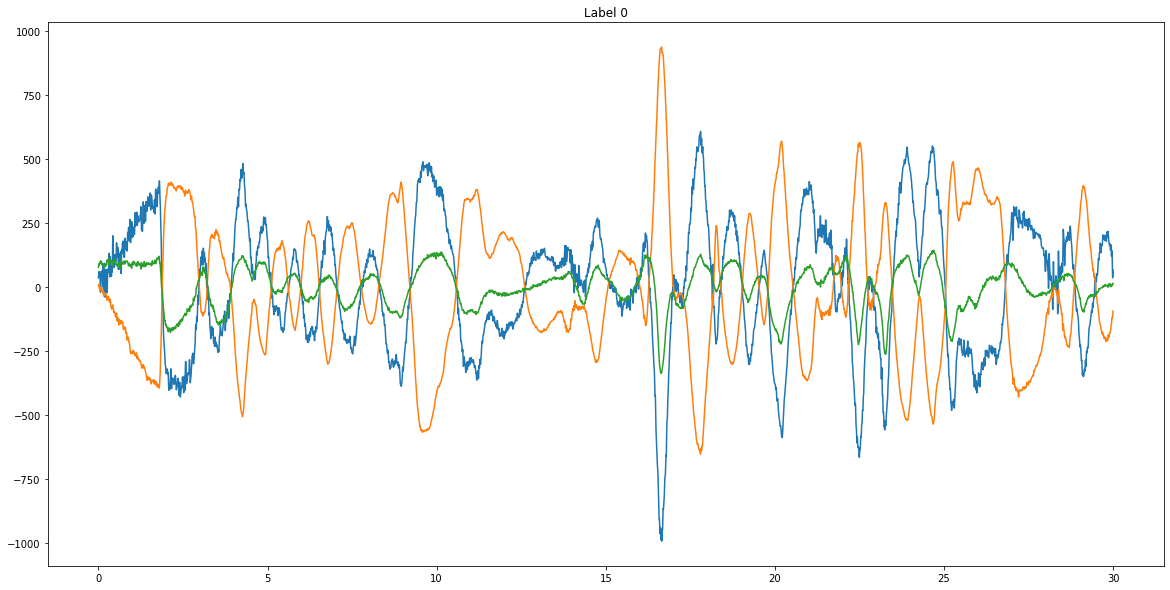

EarEEG Minimum :-991.8313523688344
EarEEG Maximum :609.1939737666356
EOG Minimum :-651.8601389901512
EOG Maximum :939.7236662957444
EMG Minimum :-335.8451085933389
EMG Maximum :144.46598996431283
EarEEG Mean :6.883944981003053
EarEEG Standard Deviation :254.08558937243401
EOG Mean :-7.273333316184201
EOG Standard Deviation :271.8735322580705
EMG Mean :2.2777987753725273
EMG Standard Deviation :79.56316535938474


In [ ]:
psg_data, label = next(iter(train_data_loader))
print(f"PSG batch shape: {psg_data.size()}")
print(f"Labels batch shape: {label.size()}")

t = np.arange(0,30,1/200)
plt.figure(figsize = (20,10))
plt.plot(t,psg_data[0,0,0,:].squeeze())
plt.plot(t,psg_data[0,0,1,:].squeeze())
plt.plot(t,psg_data[0,0,2,:].squeeze())
plt.title(f"Label {label[0].squeeze()}")
plt.show()


print(f"EarEEG Minimum :{psg_data[0,0,0,:].min()}")
print(f"EarEEG Maximum :{psg_data[0,0,0,:].max()}")
print(f"EOG Minimum :{psg_data[0,0,1,:].min()}")
print(f"EOG Maximum :{psg_data[0,0,1,:].max()}")
print(f"EMG Minimum :{psg_data[0,0,2,:].min()}")
print(f"EMG Maximum :{psg_data[0,0,2,:].max()}")


print(f"EarEEG Mean :{torch.mean(psg_data[0,0,0,:])}")
print(f"EarEEG Standard Deviation :{torch.std(psg_data[0,0,0,:])}")
print(f"EOG Mean :{torch.mean(psg_data[0,0,1,:])}")
print(f"EOG Standard Deviation :{torch.std(psg_data[0,0,1,:])}")
print(f"EMG Mean :{torch.mean(psg_data[0,0,2,:])}")
print(f"EMG Standard Deviation :{torch.std(psg_data[0,0,2,:])}")


psg_data, label = next(iter(val_data_loader))
print(f"PSG batch shape: {psg_data.size()}")
print(f"Labels batch shape: {label.size()}")

t = np.arange(0,30,1/200)
plt.figure(figsize = (20,10))
plt.plot(t,psg_data[0,0,0,:].squeeze())
plt.plot(t,psg_data[0,0,1,:].squeeze())
plt.plot(t,psg_data[0,0,2,:].squeeze())
plt.title(f"Label {label[0].squeeze()}")
plt.show()


print(f"EarEEG Minimum :{psg_data[0,0,0,:].min()}")
print(f"EarEEG Maximum :{psg_data[0,0,0,:].max()}")
print(f"EOG Minimum :{psg_data[0,0,1,:].min()}")
print(f"EOG Maximum :{psg_data[0,0,1,:].max()}")
print(f"EMG Minimum :{psg_data[0,0,2,:].min()}")
print(f"EMG Maximum :{psg_data[0,0,2,:].max()}")


print(f"EarEEG Mean :{torch.mean(psg_data[0,0,0,:])}")
print(f"EarEEG Standard Deviation :{torch.std(psg_data[0,0,0,:])}")
print(f"EOG Mean :{torch.mean(psg_data[0,0,1,:])}")
print(f"EOG Standard Deviation :{torch.std(psg_data[0,0,1,:])}")
print(f"EMG Mean :{torch.mean(psg_data[0,0,2,:])}")
print(f"EMG Standard Deviation :{torch.std(psg_data[0,0,2,:])}")



### Classification Model Cross Transformer

In [ ]:
import copy
from typing import Optional, Any

import torch
from torch import Tensor
import torch.nn as nn
from torch.nn import functional as F
from torch.nn import Module
from torch.nn import MultiheadAttention
from torch.nn import ModuleList
from torch.nn.init import xavier_uniform_
from torch.nn import Dropout
from torch.nn import Linear
from torch.nn import LayerNorm

In [ ]:
def _get_clones(module, N):
    return ModuleList([copy.deepcopy(module) for i in range(N)])


def _get_activation_fn(activation):
    if activation == "relu":
        return F.relu
    elif activation == "gelu":
        return F.gelu

    raise RuntimeError("activation should be relu/gelu, not {}".format(activation))

class PositionalEncoding(nn.Module):

    def __init__(self, d_model: int, dropout: float = 0.1, max_len: int = 5000):
        super().__init__()
        self.dropout = nn.Dropout(p=dropout)

        position = torch.arange(max_len).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2) * (-math.log(10000.0) / d_model))
        pe = torch.zeros(max_len, 1, d_model)
        pe[:, 0, 0::2] = torch.sin(position * div_term)
        pe[:, 0, 1::2] = torch.cos(position * div_term)
        self.register_buffer('pe', pe)

    def forward(self, x: Tensor) -> Tensor:
        """
        Args:
            x: Tensor, shape [seq_len, batch_size, embedding_dim]
        """
        x = x + self.pe[:x.size(0)]
        return self.dropout(x)

In [ ]:
#input ==> 32, 1, 1, 3000,, b==> batch, e==> embedding, s==> seq length
class Window_Embedding(nn.Module): 
    def __init__(self, in_channels: int = 1, window_size: int = 50, emb_size: int = 64):
        super(Window_Embedding, self).__init__()

        self.projection_1 =  nn.Sequential(
            # using a conv layer instead of a linear one -> performance gains, in=>B,1,3000 out=>B,64,60
            nn.Conv1d(in_channels, emb_size//4, kernel_size = window_size, stride = window_size),
            nn.LeakyReLU(),
            nn.BatchNorm1d(emb_size//4),
            # Rearrange('b e s -> b s e'),
            )
        self.projection_2 =  nn.Sequential(#################
            # using a conv layer instead of a linear one -> performance gains, in=>B,1,3000 out=>B,64,60
            nn.Conv1d(in_channels, emb_size//8, kernel_size = 5, stride = 5),
            nn.LeakyReLU(),
            nn.Conv1d(emb_size//8, emb_size//4, kernel_size = 5, stride = 5),
            nn.LeakyReLU(),
            nn.Conv1d(emb_size//4, (emb_size-emb_size//4)//2, kernel_size = 2, stride = 2),
            nn.LeakyReLU(),
            nn.BatchNorm1d((emb_size-emb_size//4)//2),
            # Rearrange('b e s -> b s e'),
            )
        
        self.projection_3 =  nn.Sequential(#################
            # using a conv layer instead of a linear one -> performance gains, in=>B,1,3000 out=>B,64,60
            nn.Conv1d(in_channels, emb_size//4, kernel_size = 25, stride = 25),
            nn.LeakyReLU(),
            nn.Conv1d(emb_size//4, (emb_size-emb_size//4)//2, kernel_size =2, stride = 2),
            nn.LeakyReLU(),
            nn.BatchNorm1d((emb_size-emb_size//4)//2),
            # Rearrange('b e s -> b s e'),
            )
        
        
        self.projection_4 = nn.Sequential(
            # using a conv layer instead of a linear one -> performance gains, in=>B,1,3000 out=>B,64,60
            nn.Conv1d(emb_size, emb_size, kernel_size = 1, stride = 1),
            nn.LeakyReLU(),
            nn.BatchNorm1d(emb_size),
            Rearrange('b e s -> b s e'),)
            
        #in=>B,64,60 out=>B,64,61
        self.cls_token = nn.Parameter(torch.randn(1,1, emb_size))
        self.arrange1 = Rearrange('b s e -> s b e')
        #in=>61,B,64 out=>61,B,64
        self.pos = PositionalEncoding(d_model=emb_size)
        #in=>61,B,64 out=>B,61,64
        self.arrange2 = Rearrange('s b e -> b s e ')

    def forward(self, x: Tensor) -> Tensor:
        x = x.squeeze().unsqueeze(dim = 1)
        # print(x.shape)
        b,_, _ = x.shape
        x_1 = self.projection_1(x)  ########################
        x_2 = self.projection_2(x) ###########
        x_3 = self.projection_3(x) 
        # print(x_local.shape,x_global.shape)
        x = torch.cat([x_1,x_2,x_3],dim = 1)##### 2)
        x = self.projection_4(x) 
        # print(x.shape)
        cls_tokens = repeat(self.cls_token, '() s e -> b s e', b=b)
        # print(cls_tokens.shape)
        # prepend the cls token to the input
        x = torch.cat([cls_tokens, x], dim=1)
        # print(x.shape)
        # add position embedding
        x = self.arrange1(x)
        # print(x.shape)
        x = self.pos(x)
        # print(x.shape)
        x = self.arrange2(x)
        # print(x.shape)
        return x

In [ ]:
#input ==>(b,s,e)=>(32, 61, 64,) 
# b==> batch, s==> seq length, e==> embedding, 
class Intra_modal_atten(nn.Module): 
    def __init__(self, d_model=64, nhead=8, dropout=0.1,
                 layer_norm_eps=1e-5, window_size = 25, First = True,
                 device=None, dtype=None) -> None:
        super(Intra_modal_atten, self).__init__()
        factory_kwargs = {'device': device, 'dtype': dtype}
       
        if First == True:
            self.window_embed = Window_Embedding(in_channels = 1, window_size = window_size, emb_size = d_model)
        self.norm = LayerNorm(d_model, eps=layer_norm_eps, **factory_kwargs)  
        self.self_attn = MultiheadAttention(d_model, nhead, dropout=dropout, batch_first=True,
                                            **factory_kwargs)
        self.dropout = Dropout(dropout) 
        self.First = First

    def forward(self, x: Tensor) -> Tensor:
        if self.First == True:
            src = self.window_embed(x)
        else:
            src = x
        # print(src.shape)
        # src = self.norm(src)  #####
        # print(src.shape)
        src2 = self.self_attn(src, src, src)[0]
        # print(src2.shape)
        out = src + self.dropout(src2)
        out = self.norm(out)   ########
        return out                              

In [ ]:
##Cross Modal Attention
#input ==>(b,s,e)=>(32, 2, 64,) ==> Class tokens of EEG and EOG after intra modal attention
# b==> batch, s==> seq length, e==> embedding, 
class Cross_modal_atten(nn.Module): 
    def __init__(self, d_model=64, nhead=8, dropout=0.1,
                 layer_norm_eps=1e-5, First = False,
                 device=None, dtype=None) -> None:

        super(Cross_modal_atten, self).__init__()
        factory_kwargs = {'device': device, 'dtype': dtype}

        if First == True:
            self.cls_token = nn.Parameter(torch.randn(1,1, d_model)) ######
        self.norm = LayerNorm(d_model, eps=layer_norm_eps, **factory_kwargs)  
        self.cross_attn = MultiheadAttention(d_model, nhead, dropout=dropout, batch_first=True,
                                            **factory_kwargs)
        self.dropout = Dropout(dropout) 
        self.First = First

    def forward(self, x1: Tensor,x2: Tensor) -> Tensor:
        # print(x1.shape,x2.shape)
        if len(x1.shape) == 2:
            x = torch.cat([x1.unsqueeze(dim=1), x2.unsqueeze(dim=1)], dim=1)
        else:
            x = torch.cat([x1, x2.unsqueeze(dim=1)], dim=1)
        # print(x.shape)
        b,_, _ = x.shape
        if self.First == True:
            cls_tokens = repeat(self.cls_token, '() s e -> b s e', b=b)  ######
            # print(cls_tokens.shape)
            # prepend the cls token to the input
            src = torch.cat([cls_tokens, x], dim=1)  #####
        else:
            src = x
        # print(src.shape)
        # src = self.norm(src)#####(src)
        # print(src.shape)
        src2 = self.cross_attn(src, src, src)[0]
        # print(src2.shape)
        out = src + self.dropout(src2)
        out = self.norm(out)
        return out  

In [ ]:
##Feed Forward Networks
#input ==>(b,s,e)=>(32, 61, 64,) 
# b==> batch, s==> seq length, e==> embedding, 
class Feed_forward(nn.Module): 
    def __init__(self, d_model=64,dropout=0.1,dim_feedforward=512,
                 layer_norm_eps=1e-5,
                 device=None, dtype=None) -> None:

        super(Feed_forward, self).__init__()
        factory_kwargs = {'device': device, 'dtype': dtype}

        self.norm = LayerNorm(d_model, eps=layer_norm_eps, **factory_kwargs)
        self.linear1 = Linear(d_model, dim_feedforward, **factory_kwargs)
        self.relu = nn.ReLU()
        self.dropout1 = Dropout(dropout)
        self.linear2 = Linear(dim_feedforward, d_model, **factory_kwargs)
        self.dropout2 = Dropout(dropout)
        
    def forward(self, x: Tensor) -> Tensor:
        # print(x.shape)
        # src = self.norm(x)  ######
        src = x
        # print(src.shape)
        src2 = self.linear2(self.dropout1(self.relu(self.linear1(src))))
        # print(src2.shape)
        out = src + self.dropout2(src2)
        out = self.norm(out)
        return out

In [ ]:
# # Best Model so far fine tuning
# class Cross_Transformer_Network(nn.Module):
#     def __init__(self,d_model = 64, dim_feedforward=512,window_size = 25): #  filt_ch = 4
#         super(Cross_Transformer_Network, self).__init__()
        
#         self.eeg_atten = Intra_modal_atten(d_model=d_model, nhead=8, dropout=0.1,
#                                             window_size =window_size, First = True )
#         self.eog_atten = Intra_modal_atten(d_model=d_model, nhead=8, dropout=0.1, 
#                                             window_size =window_size, First = True )
#         self.eeg2_atten = Intra_modal_atten(d_model=d_model, nhead=8, dropout=0.1, 
#                                             window_size =window_size, First = True )
        
#         self.cross_atten = Cross_modal_atten(d_model=d_model, nhead=8, dropout=0.1, First = False )
        
#         self.cross_ff= Feed_forward(d_model = d_model,dropout=0.1,dim_feedforward = dim_feedforward)
#         # self.eog_ff = Feed_forward(d_model = d_model,dropout=0.1,dim_feedforward = dim_feedforward)
#         # self.eeg2_ff = Feed_forward(d_model = d_model,dropout=0.1,dim_feedforward = dim_feedforward)



#         self.mlp    = nn.Sequential(nn.Flatten(),
#                                     nn.Linear(d_model*3,5))  ##################
#         # 

#     def forward(self, eeg: Tensor,eog: Tensor,eeg2: Tensor,finetune = True): 
#         self_eeg = self.eeg_atten(eeg)
#         self_eog = self.eog_atten(eog)
#         self_eeg2 = self.eeg2_atten(eeg)
#         # print(self_eeg.shape,self_eeg2.shape)
#         self_eeg_new = torch.cat((self_eeg[:,0,:].unsqueeze(dim=1),self_eeg2[:,0,:].unsqueeze(dim=1)), dim=1)
#         cross = self.cross_atten(self_eeg_new,self_eog[:,0,:])

#         cross_cls = cross[:,0,:].unsqueeze(dim=1)
#         cross_eeg = cross[:,1,:].unsqueeze(dim=1)
#         cross_eog = cross[:,2,:].unsqueeze(dim=1)

#         # eeg_new =  torch.cat([cross_cls, self_eeg[:,1:,:]], dim=1)
#         # eog_new =  torch.cat([cross_cls, self_eog[:,1:,:]], dim=1)
#         # eeg2_new =  torch.cat([cross_cls, self_eeg2[:,1:,:]], dim=1)

#         ff_cross =  self.cross_ff(cross)
#         # ff_eog = self.eog_ff(eog_new)
#         # ff_eeg2 = self.eeg2_ff(eeg2_new)

        

#         # cls_out = torch.cat([cross_cls[:,0,:],ff_eeg[:,0,:], ff_eog[:,0,:]], dim=1).unsqueeze(dim=1) ######
#         # cls_out = #torch.cat([ff_eeg[:,0,:], ff_eog[:,0,:],ff_eeg2[:,0,:]], dim=1).unsqueeze(dim=1) 

#         feat_list = [ff_cross,self_eeg,self_eog,self_eeg2]
#         if finetune == True:
#             out = self.mlp(ff_cross)  #########
#             return out,ff_cross,feat_list
#         else:
#             return ff_cross[:,0,:]#feat_list

In [ ]:
# Best Model so far fine tuning
class Cross_Transformer_Network(nn.Module):
    def __init__(self,d_model = 64, dim_feedforward=512,window_size = 25): #  filt_ch = 4
        super(Cross_Transformer_Network, self).__init__()
        
        self.eeg_atten = Intra_modal_atten(d_model=d_model, nhead=8, dropout=0.1,
                                            window_size =window_size, First = True )
        self.eog_atten = Intra_modal_atten(d_model=d_model, nhead=8, dropout=0.1, 
                                            window_size =window_size, First = True )
        self.eeg2_atten = Intra_modal_atten(d_model=d_model, nhead=8, dropout=0.1, 
                                            window_size =window_size, First = True )
        
        self.cross_atten = Cross_modal_atten(d_model=d_model, nhead=8, dropout=0.1, First = True )
        
        self.eeg_ff = Feed_forward(d_model = d_model,dropout=0.1,dim_feedforward = dim_feedforward)
        self.eog_ff = Feed_forward(d_model = d_model,dropout=0.1,dim_feedforward = dim_feedforward)
        self.eeg2_ff = Feed_forward(d_model = d_model,dropout=0.1,dim_feedforward = dim_feedforward)



        self.mlp    = nn.Sequential(nn.Flatten(),
                                    nn.Linear(d_model*3,5))  ##################
        # 

    def forward(self, eeg: Tensor,eog: Tensor,eeg2: Tensor,finetune = True): 
        self_eeg = self.eeg_atten(eeg)
        self_eog = self.eog_atten(eog)
        self_eeg2 = self.eeg2_atten(eeg)
        # print(self_eeg.shape,self_eeg2.shape)
        self_eeg_new = torch.cat((self_eeg[:,0,:].unsqueeze(dim=1),self_eeg2[:,0,:].unsqueeze(dim=1)), dim=1)
        cross = self.cross_atten(self_eeg_new,self_eog[:,0,:])

        cross_cls = cross[:,0,:].unsqueeze(dim=1)
        cross_eeg = cross[:,1,:].unsqueeze(dim=1)
        cross_eog = cross[:,2,:].unsqueeze(dim=1)

        eeg_new =  torch.cat([cross_cls, self_eeg[:,1:,:]], dim=1)
        eog_new =  torch.cat([cross_cls, self_eog[:,1:,:]], dim=1)
        eeg2_new =  torch.cat([cross_cls, self_eeg2[:,1:,:]], dim=1)

        ff_eeg = self.eeg_ff(eeg_new)
        ff_eog = self.eog_ff(eog_new)
        ff_eeg2 = self.eeg2_ff(eeg2_new)

        

        # cls_out = torch.cat([cross_cls[:,0,:],ff_eeg[:,0,:], ff_eog[:,0,:]], dim=1).unsqueeze(dim=1) ######
        cls_out = torch.cat([ff_eeg[:,0,:], ff_eog[:,0,:],ff_eeg2[:,0,:]], dim=1).unsqueeze(dim=1) 

        feat_list = [cross_cls,ff_eeg,ff_eog,ff_eeg2]
        if finetune == True:
            out = self.mlp(cls_out)  #########
            return out,cls_out,feat_list
        else:
            return cls_out#feat_list

### Model Training

In [ ]:
import torch.optim as optim

d_model = 256 #256 
dim_feedforward=1024  #1024
window_size = 50#25 50
# Net = Cross_Transformer_Network(d_model = d_model, dim_feedforward=dim_feedforward,
#                                 window_size = window_size ).to(device)
Net =  torch.load('/content/drive/MyDrive/EarEEG/EAREEGV2-112/checkpoint_model_epoch_best_kappa2.pth.tar').to(device)

lr = 0.001#0.001
beta_1 =  0.9    
beta_2 =  0.999    
eps = 1e-9
n_epochs = 20

criterion = nn.CrossEntropyLoss()#weight=weights) #####I didnt use weithgs for Ear EEG
optimizer = torch.optim.Adam(Net.parameters(), lr=lr, betas=(beta_1, beta_2),eps = eps, weight_decay = 0.0001)
# optimizer = torch.optim.AdamW(Net.parameters(), lr=lr, betas=(beta_1, beta_2),eps = eps, weight_decay = 0.0001)

#3.68,5.79,3.56,9.24,4.71

lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=100, gamma=0.5) 
# lr_scheduler = torch.optim.lr_scheduler.CyclicLR(optimizer, base_lr=0.0001, max_lr=0.001,
#                                                 step_size_up=5,step_size_down = 50,mode="triangular",cycle_momentum = False)

psg_data, label = next(iter(train_data_loader))


pred,cls_outs,feat_list = Net(psg_data[:,:,0,:].float().to(device),psg_data[:,:,1,:].float().to(device), psg_data[:,:,2,:].float().to(device),finetune = True)
print(pred.shape,cls_outs.shape,len(feat_list))
for i in feat_list:
  print(i.shape)

torch.Size([32, 5]) torch.Size([32, 1, 768]) 4
torch.Size([32, 1, 256])
torch.Size([32, 121, 256])
torch.Size([32, 121, 256])
torch.Size([32, 121, 256])


In [ ]:
# this is for Neptune
parameters = {
    "Experiment" : " Transfer learning",
    'Model Type' : "Each channel encoded using cnn1d, then cross transformer, then one MLP",# separate MLPs with dropout for wake and sleep",
    'signal' : "EEG (c3o1,c4o2,a1a2) to EAR EEG - L-R,L,R",
    'd_model' : d_model,
    'dim_feedforward' : dim_feedforward,
    'window_size ':window_size ,
    'Batch Size': batch_size,
    'Loss': f"Weighted Categorical Loss",  # Check this every time
    'Optimizer' : "Adam",        # Check this every time   
    'Learning Rate': lr,
    'eps' : eps,
    "LR Schduler": "StepLR",
    'Beta 1': beta_1,
    'Beta 2': beta_2,
    'n_epochs': n_epochs,
    'val_set' : val_data_list[0]+1,
    'threshold': 0.5
}
run['model/parameters'] = parameters
run['model/model_architecture'] = Net

### Metrics

In [ ]:
from torch.autograd import Variable
from sklearn.metrics import cohen_kappa_score

def accuracy(outputs, labels):
    # m = nn.Softmax(dim=1) #########
    # outputs = m(outputs)   ########
    # print(sum(outputs[0,:]))
    pred = torch.argmax(outputs, 1)
    # print(pred)
    correct = pred.eq(labels.view_as(pred)).sum().item()
    total = int(labels.shape[0])
    return correct / total

def kappa(output, label):  
  # m = nn.Softmax(dim=1) #########
  # output = m(output)   ########
  preds = torch.argmax(output, 1)
  # y_true = y_targets.cpu().numpy()
  # y_pred = y_preds.cpu().numpy()
  return cohen_kappa_score(label, preds)


# def sensitivity(outputs, labels):
#     #tp/tp+fn
#     t = Variable(torch.Tensor([0.5]))  # threshold
#     preds = (outputs > t).float() * 1
#     tp = torch.sum(preds*labels == 1)
#     fn = torch.sum((abs(preds-1))*labels==1)
#     # print(preds)
#     return tp/(tp+fn) if (tp+fn)!=0 else 0

# def specificity(outputs, labels):
#     #tn/tn+fp
#     t = Variable(torch.Tensor([0.5]))  # threshold
#     preds = (outputs > t).float() * 1
#     tn = torch.sum((abs(preds-1))*(abs(labels-1)) == 1)
#     fp = torch.sum(preds*(abs(labels-1)) ==1)
#     # print(preds)
#     return tn/(tn+fp) if (tn+fp)!=0 else 0

def g_mean(sensitivity, specificity):
    return (sensitivity*specificity)**0.5

In [ ]:
# batch_size = 10 # nb_samples
# n_classes = 4
output = torch.randn(batch_size,5) # refer to output after softmax
lab = torch.randint(0, 5, (batch_size,)) # labels
#print(label)


def confusion_matrix(output, label, n_classes, batch_size, print_conf_mat = False):
    # m = nn.Softmax(dim=1) #########
    # output = m(output)   ########
    preds = torch.argmax(output, 1)
    # print(preds)
    # print(label)
    conf_matrix = torch.zeros(n_classes, n_classes)
    avg_sensitivity = 0
    avg_specificity = 0
    avg_F1_score = 0
    avg_precision = 0
    sens_list = []
    spec_list = []
    F1_list = []
    precision_list = []

    for p, t in zip(preds, label):
        conf_matrix[p, t] += 1
    if print_conf_mat==True:    ##Jathu made this edit
      print(conf_matrix)

      plot_confusion_matrix(cm = conf_matrix.cpu().numpy(),
                      normalize    = True,
                      target_names = ['Wake', 'N1', 'N2','N3','REM'],
                      title        = "Confusion Matrix (5-Class)")
      # plt.figure(figsize=(8, 6))
      # plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.get_cmap('Blues'))
      # plt.title('Confusion Matrix')
      # plt.colorbar()
      # fig, ax = plt.subplots(figsize=(7.5, 7.5))
      # ax.matshow(conf_matrix, cmap=plt.get_cmap('Blues'), alpha=1)
      # for i in range(conf_matrix.shape[0]):
      #     for j in range(conf_matrix.shape[1]):
      #         ax.text(x=j, y=i,s=int(conf_matrix[i, j]), va='center', ha='center', size='xx-large')
 
      # plt.xlabel('Prediction', fontsize=18)
      # plt.ylabel('Ground Truth', fontsize=18)
      # plt.title('Confusion Matrix', fontsize=18)
      # plt.colorbar()
      plt.show()

    TP = conf_matrix.diag()
    for c in range(n_classes):
        idx = torch.ones(n_classes).byte()
        idx[c] = 0
        TN = conf_matrix[idx.nonzero()[:,None], idx.nonzero()].sum()
        FP = conf_matrix[c, idx].sum()
        FN = conf_matrix[idx, c].sum()

        if (TP[c]+FN) != 0:
          sensitivity = (TP[c] / (TP[c]+FN))
        else:
          sensitivity = 0

        if (TN+FP) != 0:
          specificity = (TN / (TN+FP))
        else:
          specificity = 0

        if ((2*TP[c]) + (FN + FP)) !=0:
          F1_score = (2*TP[c])/((2*TP[c]) + (FN + FP))
        else:
          F1_score = 0
        
        if (TP[c]+FP) !=0:
          precision = (TP[c]/(TP[c]+FP))
        else:
          precision = 0


        sens_list.append(float(sensitivity))
        spec_list.append(float(specificity))
        F1_list.append(float(F1_score))
        precision_list.append(float(precision))

        avg_sensitivity += float(sensitivity)
        avg_specificity += float(specificity)
        avg_F1_score += float(F1_score)
        avg_precision +=float(precision)

        # print('Class {}\nTP {}, TN {}, FP {}, FN {}'.format(c, TP[c], TN, FP, FN))
        # print('Sensitivity = {}'.format(sensitivity))
        # print('Specificity = {}'.format(specificity))
    return sens_list, spec_list,F1_list, precision_list, avg_sensitivity/5, avg_specificity/5, avg_F1_score/5, avg_precision/5 

confusion_matrix(output, lab,5,batch_size)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:54: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at  ../aten/src/ATen/native/IndexingUtils.h:30.)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at  ../aten/src/ATen/native/IndexingUtils.h:30.)


([0.4000000059604645, 0.25, 0.0, 0.20000000298023224, 0.4000000059604645],
 [0.9090909361839294,
  0.7916666865348816,
  0.8928571343421936,
  0.8518518805503845,
  0.6666666865348816],
 [0.5, 0.2666666805744171, 0.0, 0.20000000298023224, 0.25],
 [0.6666666865348816,
  0.2857142984867096,
  0.0,
  0.20000000298023224,
  0.1818181872367859],
 0.2500000029802322,
 0.8224266648292542,
 0.24333333671092988,
 0.26683983504772185)

### Training

In [ ]:
class AverageMeter(object):
    """Computes and stores the average and current value"""
    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count if self.count != 0 else 0

In [ ]:
# Training the model
import warnings
warnings.filterwarnings("ignore")

best_val_acc = 0.0
best_val_kappa = 0.0
for epoch_idx in range(n_epochs):  # loop over the dataset multiple times
    Net.train()
    print(f'===========================================================Training Epoch : [{epoch_idx+1}/{n_epochs}] ===========================================================================================================>')
    batch_time = AverageMeter()
    data_time = AverageMeter()
    
    losses = AverageMeter()
    val_losses = AverageMeter()
    
    train_accuracy = AverageMeter()
    val_accuracy = AverageMeter()

    train_sensitivity = AverageMeter()
    val_sensitivity = AverageMeter()
    
    train_specificity = AverageMeter()
    val_specificity = AverageMeter()

    train_gmean = AverageMeter()
    val_gmean = AverageMeter()

    train_kappa = AverageMeter()
    val_kappa = AverageMeter()

    train_f1_score = AverageMeter()
    val_f1_score = AverageMeter()

    train_precision = AverageMeter()
    val_precision = AverageMeter()

    class1_sens = AverageMeter()
    class2_sens = AverageMeter()
    class3_sens = AverageMeter()
    class4_sens = AverageMeter()
    class5_sens = AverageMeter()

    class1_spec = AverageMeter()
    class2_spec = AverageMeter()
    class3_spec = AverageMeter()
    class4_spec = AverageMeter()
    class5_spec = AverageMeter()

    class1_f1 = AverageMeter()
    class2_f1 = AverageMeter()
    class3_f1 = AverageMeter()
    class4_f1 = AverageMeter()
    class5_f1 = AverageMeter()

    end = time.time()

    for batch_idx, data_input in enumerate(train_data_loader):
        # get the inputs; data is a list of [inputs, labels]
        data_time.update(time.time() - end)
        psg, labels = data_input
        eeg = psg[:,:,0,:]
        eog = psg[:,:,1,:]
        emg = psg[:,:,2,:]
        cur_batch_size = len(eeg)
        

        optimizer.zero_grad()

        # forward + backward + optimize
        outputs,_,_ = Net(eeg.float().to(device), eog.float().to(device), emg.float().to(device))
        # print(outputs.shape, labels.shape)
        # bin_labels = np.bincount(la?bels)+ 
        eps = 0.00001
        # print(bin_labels)
        # weights = torch.tensor([1/(torch.count_nonzero(labels==0)+eps), 1/(torch.count_nonzero(labels==1)+eps), 1/(torch.count_nonzero(labels==2)+eps), 1/(torch.count_nonzero(labels==3)+eps), 1/(torch.count_nonzero(labels==4)+eps)])
        # criterion = nn.CrossEntropyLoss(weight=weights.float())
        loss = criterion(outputs.cpu(), labels)#.to(device))
        

        loss.backward()
        optimizer.step()
        # scheduler.step()
        
        losses.update(loss.data.item())
        train_accuracy.update(accuracy(outputs.cpu(), labels))

        _,_,_,_,sens,spec,f1, prec = confusion_matrix(outputs.cpu(), labels, 5, cur_batch_size)
        train_sensitivity.update(sens)
        train_specificity.update(spec)
        train_f1_score.update(f1)
        train_precision.update(prec)
        train_gmean.update(g_mean(sens, spec))
        train_kappa.update(kappa(outputs.cpu(), labels))
        
        run['train/epoch/batch_loss'].log(losses.val)     #1
        run['train/epoch/batch_accuracy'].log(train_accuracy.val)
        
        # measure elapsed time
        batch_time.update(time.time() - end)
        end = time.time()

        run['epoch'].log(epoch_idx)

        if batch_idx % 100 == 0:
            
            msg = 'Epoch: [{0}/{3}][{1}/{2}]\t' \
                  'Train_Loss {loss.val:.5f} ({loss.avg:.5f})\t'\
                  'Train_Acc {train_acc.val:.5f} ({train_acc.avg:.5f})\t'\
                  'Train_G-Mean {train_gmean.val:.5f}({train_gmean.avg:.5f})\t'\
                  'Train_Kappa {train_kap.val:.5f}({train_kap.avg:.5f})\t'\
                  'Train_MF1 {train_mf1.val:.5f}({train_mf1.avg:.5f})\t'\
                  'Train_Precision {train_prec.val:.5f}({train_prec.avg:.5f})\t'\
                  'Train_Sensitivity {train_sens.val:.5f}({train_sens.avg:.5f})\t'\
                  'Train_Specificity {train_spec.val:.5f}({train_spec.avg:.5f})\t'\
                  'Time {batch_time.val:.3f}s ({batch_time.avg:.3f}s)\t' \
                  'Speed {speed:.1f} samples/s\t' \
                  'Data {data_time.val:.3f}s ({data_time.avg:.3f}s)\t'.format(
                      epoch_idx+1, batch_idx, len(train_data_loader),n_epochs, batch_time=batch_time,
                      speed=data_input[0].size(0)/batch_time.val,
                      data_time=data_time, loss=losses, train_acc = train_accuracy,
                      train_sens =train_sensitivity, train_spec = train_specificity, train_gmean = train_gmean,
                      train_kap = train_kappa, train_mf1 = train_f1_score, train_prec = train_precision)
            print(msg)


    #evaluation
    with torch.no_grad():
      Net.eval()
      for batch_val_idx, data_val in enumerate(val_data_loader):
        val_psg, val_labels = data_val
        val_eeg = val_psg[:,:,0,:]
        val_eog = val_psg[:,:,1,:]
        val_emg = val_psg[:,:,2,:]
        cur_val_batch_size = len(val_eeg)
        pred,_,_= Net(val_eeg.float().to(device), val_eog.float().to(device), val_emg.float().to(device))

        # bin_val_labels = np.bincount(val_labels)+ 0.00001
        # print(bin_labels)
        # weights = torch.tensor([1./bin_val_labels[0], 1./bin_val_labels[1], 1./bin_val_labels[2], 1./bin_val_labels[3], 1./bin_val_labels[4]])
        # print(weights)
        # criterion = nn.CrossEntropyLoss(weight=weights.float())
        val_loss = criterion(pred.cpu(), val_labels)#.to(device))
        val_losses.update(val_loss.data.item())
        val_accuracy.update(accuracy(pred.cpu(), val_labels))

        sens_list,spec_list,f1_list,prec_list, sens,spec,f1,prec = confusion_matrix(pred.cpu(), val_labels,  5, cur_val_batch_size)
        val_sensitivity.update(sens)
        val_specificity.update(spec)
        val_f1_score.update(f1)
        val_precision.update(prec)
        val_gmean.update(g_mean(sens, spec))
        val_kappa.update(kappa(pred.cpu(), val_labels))

        class1_sens.update(sens_list[0])
        class2_sens.update(sens_list[1])
        class3_sens.update(sens_list[2])
        class4_sens.update(sens_list[3])
        class5_sens.update(sens_list[4])

        class1_spec.update(spec_list[0])
        class2_spec.update(spec_list[1])
        class3_spec.update(spec_list[2])
        class4_spec.update(spec_list[3])
        class5_spec.update(spec_list[4])

        class1_f1.update(f1_list[0])
        class2_f1.update(f1_list[1])
        class3_f1.update(f1_list[2])
        class4_f1.update(f1_list[3])
        class5_f1.update(f1_list[4])

      print(batch_val_idx)

     

      print(f'===========================================================Epoch : [{epoch_idx+1}/{n_epochs}]  Evaluation ===========================================================================================================>')
      print("Training Results : ")
      print(f"Training Loss     : {losses.avg}, Training Accuracy      : {train_accuracy.avg}, Training G-Mean      : {train_gmean.avg}") 
      print(f"Training Kappa      : {train_kappa.avg},Training MF1     : {train_f1_score.avg}, Training Precision      : {train_precision.avg}, Training Sensitivity      : {train_sensitivity.avg}, Training Specificity      : {train_specificity.avg}")
      
      print("Validation Results : ")
      print(f"Validation Loss   : {val_losses.avg}, Validation Accuracy : {val_accuracy.avg}, Validation G-Mean      : {val_gmean.avg}") 
      print(f"Validation Kappa     : {val_kappa.avg}, Validation MF1      : {val_f1_score.avg}, Validation Precision      : {val_precision.avg},  Validation Sensitivity      : {val_sensitivity.avg}, Validation Specificity      : {val_specificity.avg}")
    

      print(f"Class wise sensitivity W: {class1_sens.avg}, S1: {class2_sens.avg}, S2: {class3_sens.avg}, S3: {class4_sens.avg}, R: {class5_sens.avg}")
      print(f"Class wise specificity W: {class1_spec.avg}, S1: {class2_spec.avg}, S2: {class3_spec.avg}, S3: {class4_spec.avg}, R: {class5_spec.avg}")
      print(f"Class wise F1  W: {class1_f1.avg}, S1: {class2_f1.avg}, S2: {class3_f1.avg}, S3: {class4_f1.avg}, R: {class5_f1.avg}")

      run['train/epoch/epoch_train_loss'].log(losses.avg)
      run['train/epoch/epoch_val_loss'].log(val_losses.avg)

      run['train/epoch/epoch_train_accuracy'].log(train_accuracy.avg)
      run['train/epoch/epoch_val_accuracy'].log(val_accuracy.avg)

      run['train/epoch/epoch_train_sensitivity'].log(train_sensitivity.avg)
      run['train/epoch/epoch_val_sensitivity'].log(val_sensitivity.avg)

      run['train/epoch/epoch_train_specificity'].log(train_specificity.avg)
      run['train/epoch/epoch_val_specificity'].log(val_specificity.avg)

      run['train/epoch/epoch_train_G-Mean'].log(train_gmean.avg)
      run['train/epoch/epoch_val_G-Mean'].log(val_gmean.avg)

      run['train/epoch/epoch_train_Kappa'].log(train_kappa.avg)
      run['train/epoch/epoch_val_Kappa'].log(val_kappa.avg)

      run['train/epoch/epoch_train_MF1 Score'].log(train_f1_score.avg)
      run['train/epoch/epoch_val_MF1 Score'].log(val_f1_score.avg)

      run['train/epoch/epoch_train_Precision'].log(train_precision.avg)
      run['train/epoch/epoch_val_Precision'].log(val_precision.avg)

      #################################
      
      run['train/epoch/epoch_val_Class wise sensitivity W'].log(class1_sens.avg)
      run['train/epoch/epoch_val_Class wise sensitivity S1'].log(class2_sens.avg)
      run['train/epoch/epoch_val_Class wise sensitivity S2'].log(class3_sens.avg)
      run['train/epoch/epoch_val_Class wise sensitivity S3'].log(class4_sens.avg)
      run['train/epoch/epoch_val_Class wise sensitivity R'].log(class5_sens.avg)

      run['train/epoch/epoch_val_Class wise specificity W'].log(class1_spec.avg)
      run['train/epoch/epoch_val_Class wise specificity S1'].log(class2_spec.avg)
      run['train/epoch/epoch_val_Class wise specificity S2'].log(class3_spec.avg)
      run['train/epoch/epoch_val_Class wise specificity S3'].log(class4_spec.avg)
      run['train/epoch/epoch_val_Class wise specificity R'].log(class5_spec.avg)

      run['train/epoch/epoch_val_Class wise F1 Score W'].log(class1_f1.avg)
      run['train/epoch/epoch_val_Class wise F1 Score S1'].log(class2_f1.avg)
      run['train/epoch/epoch_val_Class wise F1 Score S2'].log(class3_f1.avg)
      run['train/epoch/epoch_val_Class wise F1 Score S3'].log(class4_f1.avg)
      run['train/epoch/epoch_val_Class wise F1 Score R'].log(class5_f1.avg)

      if val_accuracy.avg > best_val_acc or (epoch_idx+1)% 50==0 or val_kappa.avg > best_val_kappa:
          if val_accuracy.avg > best_val_acc:
            run['model/bestmodel_acc'].log(epoch_idx+1)
            best_val_acc = val_accuracy.avg
            print("================================================================================================")
            print("                                          Saving Best Model (ACC)                                     ")
            print("================================================================================================")
            torch.save(Net, f'/content/drive/MyDrive/EarEEG/{experiment}/checkpoint_model_epoch_best_acc2.pth.tar')

          if val_kappa.avg > best_val_kappa:
            run['model/bestmodel_kappa'].log(epoch_idx+1)
            best_val_kappa = val_kappa.avg
            print("================================================================================================")
            print("                                          Saving Best Model (Kappa)                                    ")
            print("================================================================================================")
            torch.save(Net, f'/content/drive/MyDrive/EarEEG/{experiment}/checkpoint_model_epoch_best_kappa2.pth.tar')

          run['model/best_acc'].log(val_accuracy.avg)
          run['model/best_kappa'].log(val_kappa.avg)
          
          # if (epoch_idx+1)% 50==0 :
          #   torch.save(Net, f'/content/drive/MyDrive/EarEEG/{experiment}/checkpoint_model_epoch_last.pth.tar')
    # lr_scheduler.step()      
print('========================================Finished Training ===========================================')

===========================================================Training Epoch : [1/20] ===========================================================================================================>
Epoch: [1/20][0/184]	Train_Loss 2.89038 (2.89038)	Train_Acc 0.21875 (0.21875)	Train_G-Mean 0.31561(0.31561)	Train_Kappa -0.05125(-0.05125)	Train_MF1 0.11453(0.11453)	Train_Precision 0.10897(0.10897)	Train_Sensitivity 0.12564(0.12564)	Train_Specificity 0.79282(0.79282)	Time 0.227s (0.227s)	Speed 141.1 samples/s	Data 0.003s (0.003s)	
Epoch: [1/20][100/184]	Train_Loss 1.10084 (1.10257)	Train_Acc 0.56250 (0.60705)	Train_G-Mean 0.66320(0.65105)	Train_Kappa 0.31915(0.42156)	Train_MF1 0.46945(0.45452)	Train_Precision 0.48618(0.47542)	Train_Sensitivity 0.50833(0.48542)	Train_Specificity 0.86524(0.88283)	Time 0.112s (0.116s)	Speed 285.8 samples/s	Data 0.004s (0.005s)	
32
===========================================================Epoch : [1/20]  Evaluation ===================================================

In [ ]:
print("finished Training")
run.stop()

finished Training
Shutting down background jobs, please wait a moment...
Done!


Waiting for the remaining 98 operations to synchronize with Neptune. Do not kill this process.


All 98 operations synced, thanks for waiting!
Explore the metadata in Neptune UI:
https://app.neptune.ai/mithunjha/earEEG-v2-cross/e/EAREEGV2-162


### Evaluation

In [ ]:
test_model = Cross_Transformer_Network().to(device)
test_model = torch.load('/home/jathu/fyp_g15_sleep_monitoring/Experiments/Ear_EEG/EARCMT-2/checkpoint_model_epoch_5.pth.tar')
test_model.eval()

Cross_Transformer_Network(
  (cnn_eeg): Sequential(
    (0): Conv1d(1, 8, kernel_size=(10,), stride=(5,))
    (1): LeakyReLU(negative_slope=0.01)
    (2): Conv1d(8, 16, kernel_size=(10,), stride=(5,))
    (3): LeakyReLU(negative_slope=0.01)
    (4): Conv1d(16, 32, kernel_size=(5,), stride=(2,), padding=(2,))
    (5): LeakyReLU(negative_slope=0.01)
    (6): Conv1d(32, 64, kernel_size=(4,), stride=(2,), padding=(2,))
    (7): LeakyReLU(negative_slope=0.01)
    (8): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (cnn_eog): Sequential(
    (0): Conv1d(1, 8, kernel_size=(10,), stride=(5,))
    (1): LeakyReLU(negative_slope=0.01)
    (2): Conv1d(8, 16, kernel_size=(10,), stride=(5,))
    (3): LeakyReLU(negative_slope=0.01)
    (4): Conv1d(16, 32, kernel_size=(5,), stride=(2,), padding=(2,))
    (5): LeakyReLU(negative_slope=0.01)
    (6): Conv1d(32, 64, kernel_size=(4,), stride=(2,), padding=(2,))
    (7): LeakyReLU(negative_slope=0.01)
    (8): BatchNo

In [ ]:
import warnings
warnings.filterwarnings("ignore")
val_accuracy = AverageMeter()
val_sensitivity = AverageMeter()
val_specificity = AverageMeter()
val_f1_score = AverageMeter()
val_precision = AverageMeter()
val_gmean = AverageMeter()
val_kappa = AverageMeter()

class1_f1 = AverageMeter()
class2_f1 = AverageMeter()
class3_f1 = AverageMeter()
class4_f1 = AverageMeter()
class5_f1 = AverageMeter()

labels_val_main = []
pred_val_main = []
first = 0 
with torch.no_grad():
    test_model.eval()
    for batch_val_idx, data_val in enumerate(val_data_loader):
        val_psg, val_labels = data_val
        val_eeg = val_psg[:,:,0,:]
        val_eog = val_psg[:,:,1,:]
        val_emg = val_psg[:,:,2,:]
        cur_val_batch_size = len(val_eeg)
        pred = test_model(val_eeg.float().to(device), val_eog.float().to(device), val_emg.float().to(device))
        # val_loss = criterion(pred.cpu(), val_labels)#.to(device))
        # val_losses.update(val_loss.data.item())
        if first == 0:
            labels_val_main = val_labels.cpu().numpy()
            pred_val_main = pred.cpu().numpy()
            first = 1
        else:
            labels_val_main = np.concatenate((labels_val_main, val_labels.cpu().numpy()))
            pred_val_main =  np.concatenate((pred_val_main,pred.cpu().numpy()))

        val_accuracy.update(accuracy(pred.cpu(), val_labels))

        sens_list,spec_list,f1_list,prec_list, sens,spec,f1,prec = confusion_matrix(pred.cpu(), val_labels,  5, cur_val_batch_size)
        val_sensitivity.update(sens)
        val_specificity.update(spec)
        val_f1_score.update(f1)
        val_precision.update(prec)
        val_gmean.update(g_mean(sens, spec))
        val_kappa.update(kappa(pred.cpu(), val_labels))

        class1_f1.update(f1_list[0])
        class2_f1.update(f1_list[1])
        class3_f1.update(f1_list[2])
        class4_f1.update(f1_list[3])
        class5_f1.update(f1_list[4])

print("Validation Results : ")
print(f"Validation Accuracy : {val_accuracy.avg}, Validation G-Mean      : {val_gmean.avg}") 
print(f"Validation Kappa     : {val_kappa.avg}, Validation MF1      : {val_f1_score.avg}, Validation Precision      : {val_precision.avg},  Validation Sensitivity      : {val_sensitivity.avg}, Validation Specificity      : {val_specificity.avg}")
print(f"Class wise F1  W: {class1_f1.avg}, S1: {class2_f1.avg}, S2: {class3_f1.avg}, S3: {class4_f1.avg}, R: {class5_f1.avg}")
print(labels_val_main.shape)
print(pred_val_main.shape)

Validation Results : 
Validation Accuracy : 0.8029166666666666, Validation G-Mean      : 0.8476488747041286
Validation Kappa     : 0.7378298737579744, Validation MF1      : 0.7306538169582685, Validation Precision      : 0.7415949927767116,  Validation Sensitivity      : 0.7575365197658541, Validation Specificity      : 0.9504336849848424
Class wise F1  W: 0.8418355936805407, S1: 0.3403355042139689, S2: 0.8138957833250363, S3: 0.8431911547978719, R: 0.8140110487739245
(1908,)
(1908, 5)


In [ ]:
## 5 Class
sens_l,spec_l,f1_l,prec_l, sens,spec,f1,prec = confusion_matrix(torch.from_numpy(pred_val_main), torch.from_numpy(labels_val_main),
                                                5, labels_val_main.shape[0])#, print_conf_mat=True)


g = g_mean(sens, spec)

acc = accuracy(torch.from_numpy(pred_val_main), torch.from_numpy(labels_val_main))

kap = kappa(torch.from_numpy(pred_val_main), torch.from_numpy(labels_val_main))

print(f"Accuracy {acc}")
print(f"Kappa {kap}")
print(f"Macro F1 Score {f1}")
print(f"G Mean {g}")
print(f"Sensitivity {sens}")
print(f"Specificity {spec}")
print(f"Class wise F1 Score {f1_l}")

Accuracy 0.8029350104821803
Kappa 0.7442550718851264
Macro F1 Score 0.752279645204544
G Mean 0.8478154799859162
Sensitivity 0.7565811276435852
Specificity 0.9500515699386597
Class wise F1 Score [0.859950840473175, 0.3910256326198578, 0.8224607706069946, 0.8534621596336365, 0.8344988226890564]


In [ ]:
main_all_labels = labels_val_main
main_all_pred = pred_val_main

# main_all_labels = np.concatenate((main_all_labels, labels_val_main))
# main_all_pred = np.concatenate((main_all_pred,pred_val_main))

print(main_all_labels.shape)
print(main_all_pred.shape)

(1908,)
(1908, 5)


In [ ]:
# Fs = 200 # sampling frequency

# class CNN1(nn.Module): # smaller filter sizes to learn temporal information
#     def __init__(self):
#       # super(Feed_forward, self).__init__()
#         super(CNN1,self).__init__()
#         self.conv1 = nn.Conv1d(in_channels=3,out_channels=64,kernel_size=Fs//2,stride=Fs//16,bias=False)
#         self.pool1 = nn.MaxPool1d(kernel_size=8,stride=8)
#         self.dropout = nn.Dropout(p=0.5)
#         self.conv2_1 = nn.Conv1d(in_channels=64 ,kernel_size=8,out_channels=128,stride=2,bias=False)
#         self.conv2_2 = nn.Conv1d(in_channels=128, kernel_size=8,out_channels=128,stride=1,bias=False)
#         self.conv2_3 = nn.Conv1d(in_channels=128, kernel_size=8,out_channels=128,stride=2,bias=False)
#         self.pool2 = nn.MaxPool1d(kernel_size=4,stride=4)
#         self.bn1 = nn.BatchNorm1d(num_features=64)
#         self.bn2 = nn.BatchNorm1d(num_features=128)
#         self.bn3 = nn.BatchNorm1d(num_features=128)
#         self.bn4 = nn.BatchNorm1d(num_features=128)

#     def forward(self,x):  
#         x = F.relu(self.bn1(self.conv1(x)))
#         x = self.dropout(self.pool1(x))
#         x = F.relu(self.bn2(self.conv2_1(x)))
#         x = F.relu(self.bn3(self.conv2_2(x)))
#         x = F.relu(self.bn4(self.conv2_3(x)))
#         x = self.pool2(x)
#         return x 
        
# class CNN2(nn.Module): # larger filter sizes to learn frequency information
#     def __init__(self):
#       super(CNN2,self).__init__()
#       self.conv1 = nn.Conv1d(in_channels=3,out_channels=64,kernel_size=Fs*4,stride=Fs//2,bias=False)
#       self.pool1 = nn.MaxPool1d(kernel_size=4,stride=4)
#       self.dropout = nn.Dropout(0.5)
#       self.conv2_1 = nn.Conv1d(in_channels=64, kernel_size=6,out_channels=128,stride=1,bias=False)
#       self.conv2_2 = nn.Conv1d(in_channels=128, kernel_size=6,out_channels=128,stride=1,bias=False)
#       # self.conv2_3 = nn.Conv1d(in_channels=128, kernel_size=3,out_channels=128,stride=1,bias=False)
#       self.pool2 = nn.MaxPool1d(kernel_size=2,stride=2)
#       self.bn1 = nn.BatchNorm1d(num_features=64)
#       self.bn2 = nn.BatchNorm1d(num_features=128)
#       self.bn3 = nn.BatchNorm1d(num_features=128)
#       # self.bn4 = nn.BatchNorm1d(num_features=128)

#     def forward(self,x):  
#         x = F.relu(self.bn1(self.conv1(x)))
#         x = self.dropout(self.pool1(x))
#         x = F.relu(self.bn2(self.conv2_1(x)))
#         x = F.relu(self.bn3(self.conv2_2(x)))
#         print(x.shape)
#         # x = F.relu(self.bn4(self.conv2_3(x)))
#         x = self.pool2(x)
#         return x 

# class DeepSleepNet(nn.Module):
#     def __init__(self):
#       super(DeepSleepNet,self).__init__()
#       self.cnn1 = CNN1()
#       self.cnn2 = CNN2()
#       self.dropout = nn.Dropout(0.5)
#       self.lstm_1 = nn.LSTM(128,128,bidirectional=True, batch_first = True)
#       self.lstm_2 = nn.LSTM(256,256,bidirectional=True, batch_first = True)
#       self.fc = nn.Linear(128,512)
#       self.final_layer = nn.Linear(512,5)

#     def forward(self,x):
#         x = x.squeeze()
#         temp1 = x.clone()
#         x = self.cnn1(x)
#         temp1 = self.cnn2(temp1)
#         print(x.shape, temp1.shape)
#         x = torch.cat((x,temp1),dim=0)
#         x = x.view(-1,self.num_flat_features(x))
#         x = self.dropout(x)
#         temp2 = x.clone()
#         temp2 = self.fc(temp2)
#         x = self.lstm_2(self.dropout(self.lstm_1(x.unsqueeze(dim=1))[0]))[0]
#         print(x)
#         x = self.dropout(x)

#         x = torch.add(x,temp2)
#         x = self.dropout(x)
#         return self.final_layer(x)
#     def num_flat_features(self, x):
#         size = x.size()[1:]  # all dimensions except the batch dimension
#         num_features = 1
#         for s in size:
#             num_features *= s
#         return num_features